In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


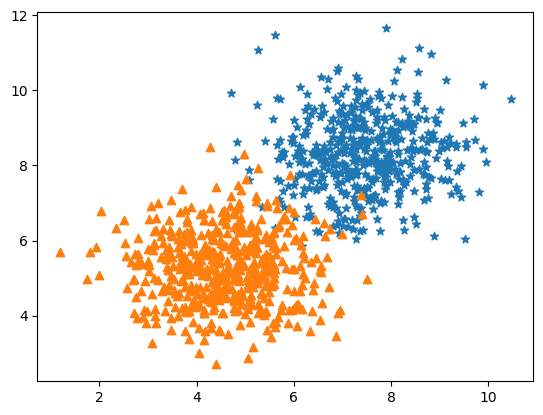

In [61]:
x, y = make_blobs(n_samples=1000, n_features=2, center_box=(0,10), centers=2)

plt.scatter(x[:, 0][y==0], x[:, 1][y==0], marker='*')
plt.scatter(x[:, 0][y==1], x[:, 1][y==1], marker='^')


<Axes: >

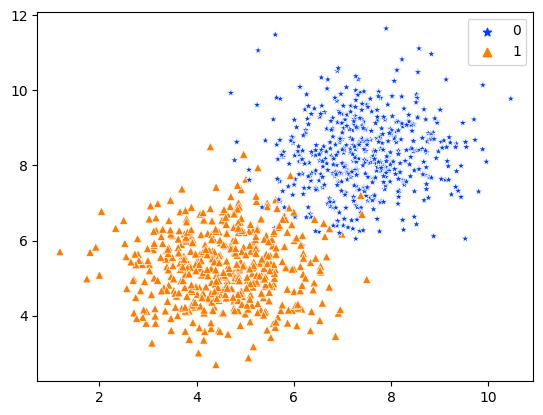

In [62]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], style=y, hue=y, markers=["*", "^"], palette="bright")

In [63]:
def show(w, w0, x, y):
    line_x = np.linspace(-2, 10)
    line_y = ((-w[0] * line_x) - w0)/w[1]

    plt.plot(line_x, line_y)
    plt.xlim([x[:, 0].min()-5, x[:, 1].max()+5])
    plt.ylim([x[:, 0].min()-5, x[:, 1].max()+5])
    sns.scatterplot(x=x[:, 0], y=x[:, 1], style=y, hue=y, markers=["*", "^"], palette="bright")
    plt.show()

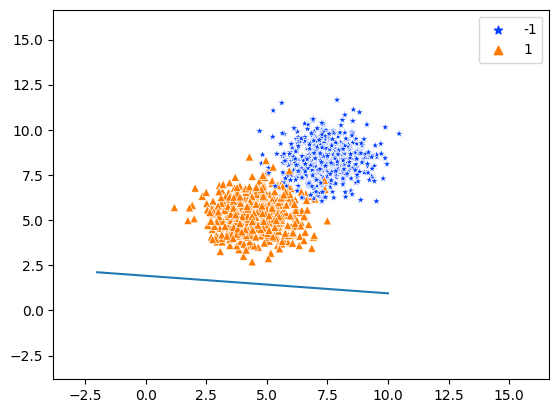

In [68]:
w = np.random.randn(2)
w0 = np.random.randn(1)

y[y==0] = -1
show(w, w0, x, y)

In [69]:
def perceptron(w, w0, x, y, iterations=500):
    for i in range(iterations):
        miss_classified = 0
        for xi, yi in zip(x, y):
            d = (np.dot(w, xi) + w0)/np.linalg.norm(w)
            halfspace = np.sign(d)
            if halfspace != yi:
                miss_classified += 1
                w = w + (xi * yi)
                w0 += np.sign(yi)
        
        # show(w, w0, x, y)
        if miss_classified == 0:
            print(f"Current accuracy : {100 - np.round(miss_classified*100/len(y), 2)}")
            show(w, w0, x, y)
            return w, w0 
        if i % 25 == 0:
            print(f"Current accuracy : {100 - np.round(miss_classified*100/len(y), 2)}")
            show(w, w0, x, y)
    return w, w0 

Current accuracy : 97.4


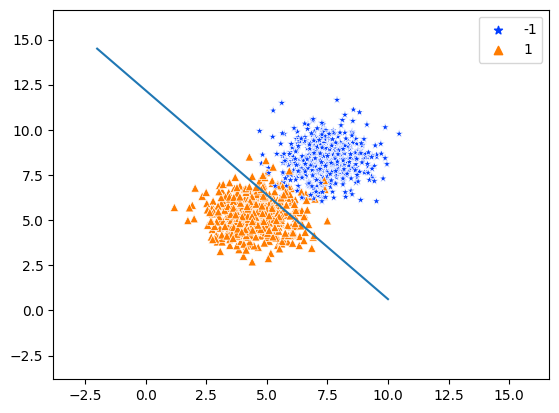

Current accuracy : 96.9


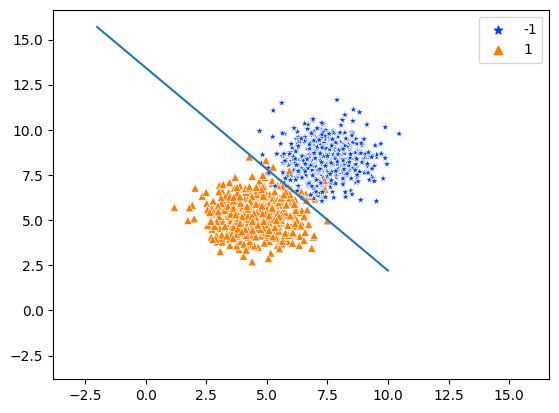

Current accuracy : 97.2


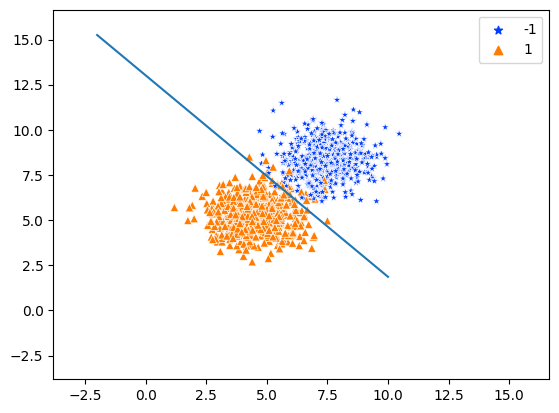

Current accuracy : 97.6


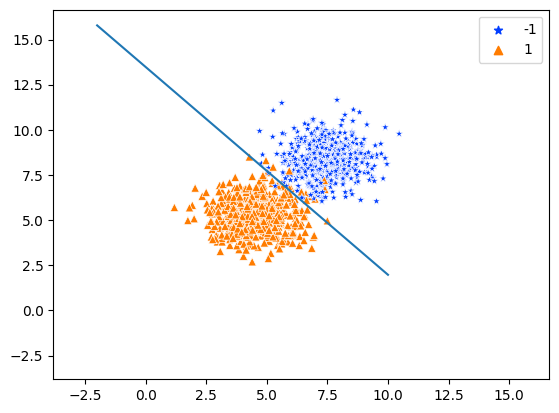

Current accuracy : 96.8


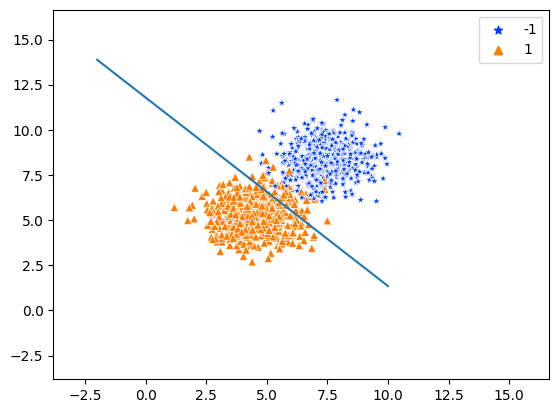

Current accuracy : 97.2


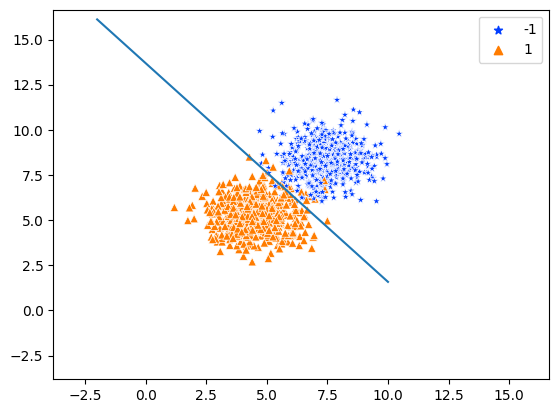

Current accuracy : 96.8


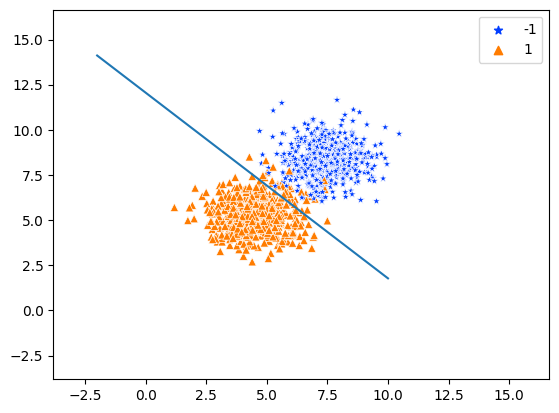

Current accuracy : 96.7


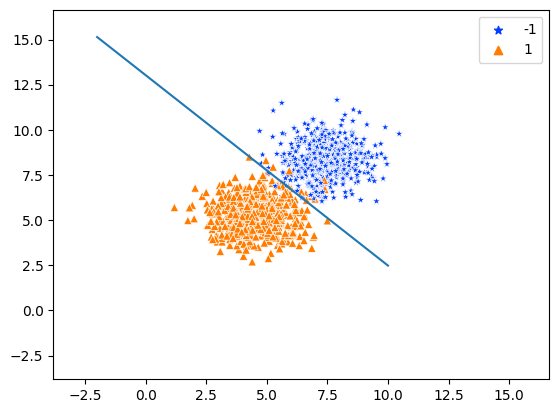

Current accuracy : 96.8


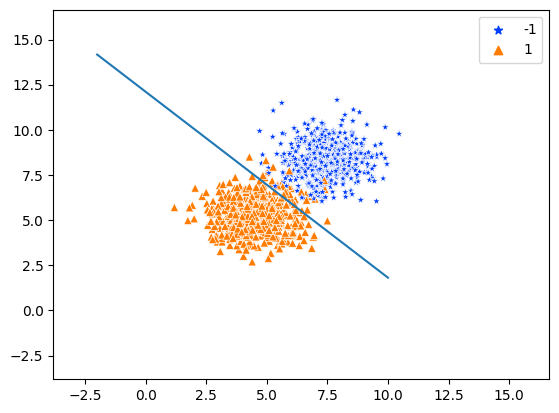

Current accuracy : 96.8


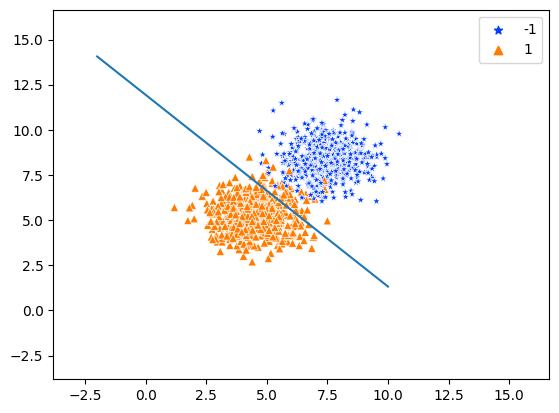

Current accuracy : 97.1


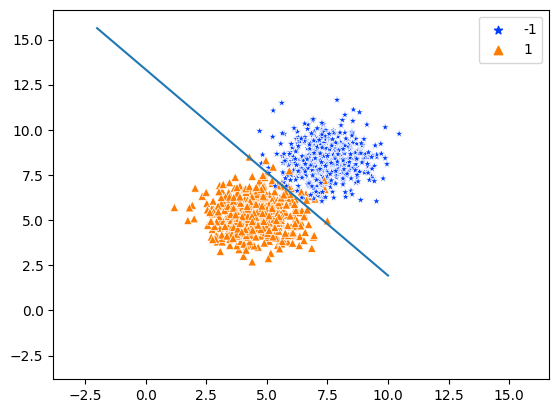

Current accuracy : 96.4


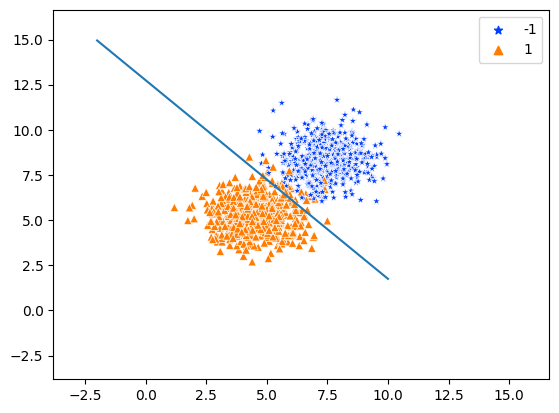

Current accuracy : 96.4


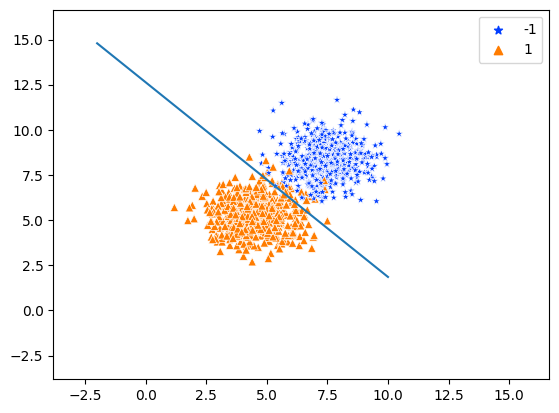

Current accuracy : 96.7


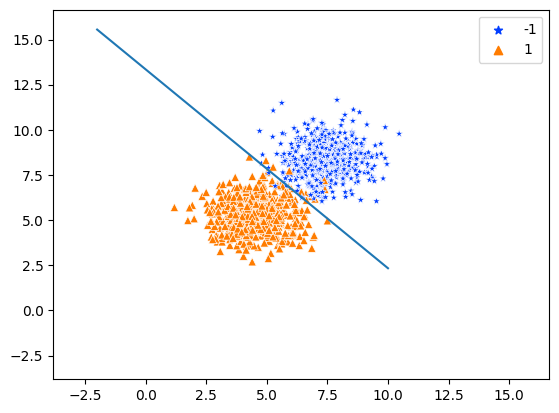

Current accuracy : 97.3


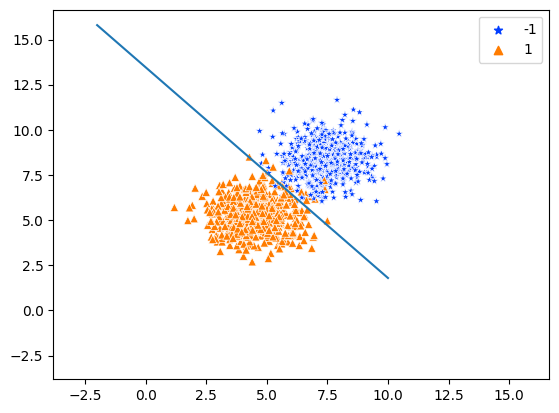

Current accuracy : 97.2


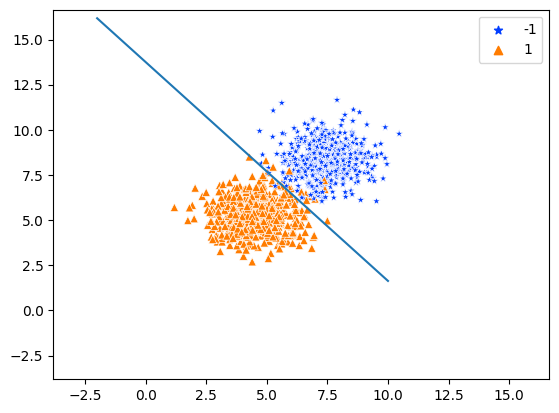

Current accuracy : 97.0


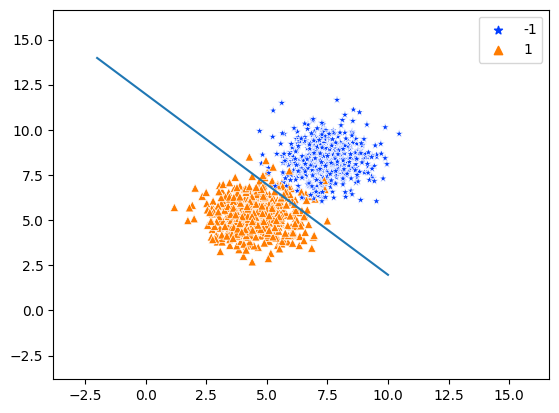

Current accuracy : 97.0


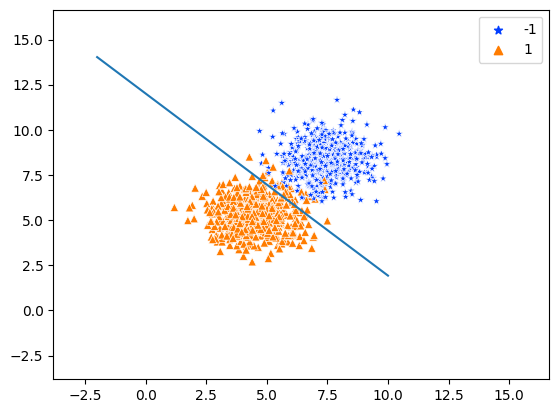

Current accuracy : 97.0


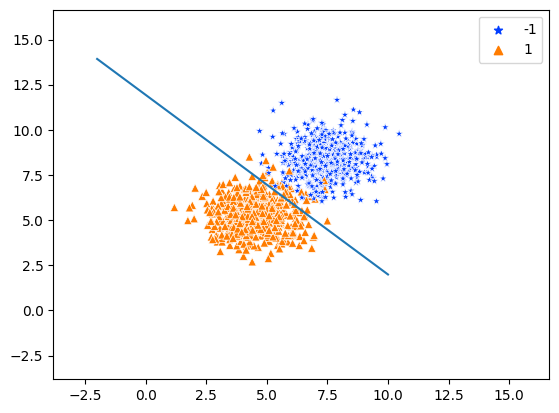

Current accuracy : 96.6


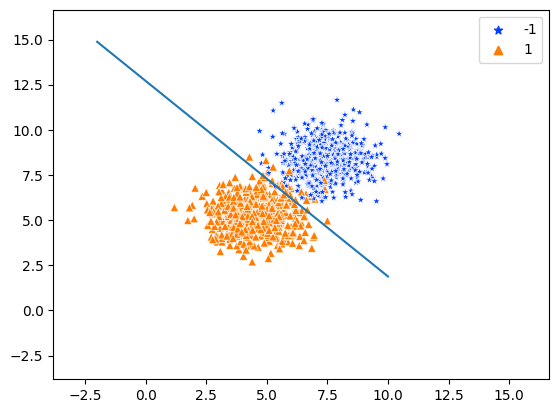

In [71]:
w, w0 = perceptron(w, w0, x, y)
